In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
df = pd.read_csv('Dd5e_monsters.csv')
# Parse health
df["HP"] = pd.to_numeric(df["HP"].str.split(" ").str[0])
# Parse Armor
df["Armor"] = pd.to_numeric(df["Armor"].str.split(" ").str[0])
# Parse CR
df["CR"] = df["Challenge rating  (XP)"].str.split(" ").str[0].apply(pd.eval)
df.drop(columns=["Challenge rating  (XP)"], inplace=True)
# Parse race + alignment
df['Alignment'] = df['Race + alignment'].str.split(',').str[-1].str.strip()
df.loc[65,'Alignment'] = 'Neutral' # Special case of 'Cloud Giant'
df['Race'] = df['Race + alignment'].str.split(',').str[:-1].str.join(',')
df['Race'] = df['Race'].str.split("(").str[0].str.strip().str.lower()
df.drop(columns=['Race + alignment'], inplace=True)

df['Fly'] = df['Speed'].str.contains('fly')
df['Burrow'] = df['Speed'].str.contains('burrow')
df['Swim'] = df['Speed'].str.contains('swim')
df['Climb'] = df['Speed'].str.contains('climb')
df.drop(columns=['Speed'], inplace=True)

display(df)
display(df.describe(include=['O', 'boolean']))
display(df.describe())
# display(df.isnull().sum())

,Name,Size,HP,Armor,CR,Alignment,Race,Fly,Burrow,Swim,Climb
0,Aboleth,Large,135,17,10.00,Lawful Evil,aberration,False,False,True,False
1,Acolyte,Medium,9,10,0.25,Any Alignment,humanoid,False,False,False,False
2,Adult Black Dragon,Huge,195,19,14.00,Chaotic Evil,dragon,True,False,True,False
3,Adult Blue Dragon,Huge,225,19,16.00,Lawful Evil,dragon,True,True,False,False
4,Adult Brass Dragon,Huge,172,18,13.00,Chaotic Good,dragon,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
319,Young Green Dragon,Large,136,18,8.00,Lawful Evil,dragon,True,False,True,False
320,Young Red Dragon,Large,178,18,10.00,Chaotic Evil,dragon,True,False,False,True
321,Young Silver Dragon,Large,168,18,9.00,Lawful Good,dragon,True,False,False,False
322,Young White Dragon,Large,133,17,6.00,Chaotic Evil,dragon,True,True,True,False


,Name,Size,Alignment,Race,Fly,Burrow,Swim,Climb
count,324,324,324,324,324,324,324,324
unique,324,6,16,15,2,2,2,2
top,Aboleth,Medium,Unaligned,beast,False,False,False,False
freq,1,128,128,87,220,303,271,289


,HP,Armor,CR
count,324.000000,324.000000,324.000000
mean,81.324074,14.043210,4.530478
std,99.182494,3.245094,5.864669
min,1.000000,5.000000,0.000000
25%,18.750000,12.000000,0.500000
50%,45.000000,13.000000,2.000000
75%,114.000000,17.000000,6.000000
max,676.000000,25.000000,30.000000


In [5]:
df.to_csv('monsters.csv', index=True)

## Pruebas de visualización

In [6]:
df = pd.read_csv('monsters.csv', index_col=0)

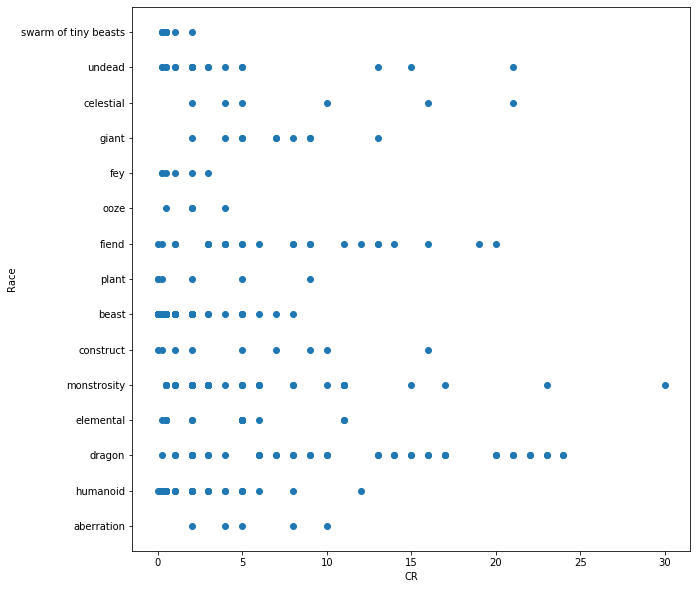

In [7]:
def scatter_plot_columns(df, x, y):
    plt.figure(figsize=(10, 10))
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatter_plot_columns(df, 'CR', 'Race')